In [67]:
# Importando as bases
import pandas as pd
pd.set_option('display.max_columns',180)
pd.set_option('display.max_rows',180)
treino = pd.read_csv('train_3.csv')
teste = pd.read_csv('test_3.csv')

In [68]:
treino =treino.drop(['GarageArea', 'GarageType_-1.1', 'GarageType_Attchd.1', 'GarageType_BuiltIn.1', 'GarageType_Detchd.1', 'GarageType_infrequent_sklearn.1'],axis=1)

In [69]:
# Verificando o formato da base
treino.shape

(1460, 146)

In [70]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      133
float64     13
Name: count, dtype: int64

In [71]:
teste.dtypes.value_counts()

int64      126
float64     20
Name: count, dtype: int64

In [72]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'Fence_MnPrv', 'Fence_infrequent_sklearn',
       'MiscFeature_infrequent_sklearn', 'SaleType_New', 'SaleType_WD',
       'SaleType_infrequent_sklearn', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_infrequent_sklearn'],
      dtype='object', length=145)

In [73]:
# E criar uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 146)

In [74]:
treino.columns[(treino.dtypes != 'object')]

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'Fence_MnPrv', 'Fence_infrequent_sklearn',
       'MiscFeature_infrequent_sklearn', 'SaleType_New', 'SaleType_WD',
       'SaleType_infrequent_sklearn', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_infrequent_sklearn'],
      dtype='object', length=146)

In [75]:
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'Fence_MnPrv', 'Fence_infrequent_sklearn',
       'MiscFeature_infrequent_sklearn', 'SaleType_New', 'SaleType_WD',
       'SaleType_infrequent_sklearn', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_infrequent_sklearn'],
      dtype='object', length=145)

In [76]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 145)

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [77]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

# Importando o train_test_split
from sklearn.model_selection import train_test_split

# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [78]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

In [79]:
# Importando a árvore de regressão
from sklearn import tree
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

In [80]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [81]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

22155.278297076085
1539556841.8519495


In [82]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

29994.163900414937
2287796284.375519


In [83]:
# e do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

34493.46887966805
2927461513.55083


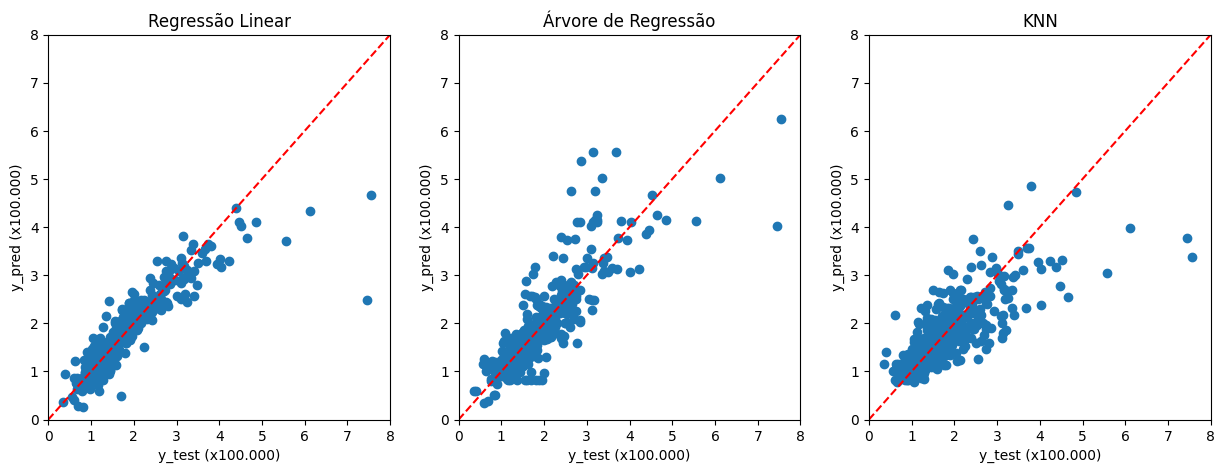

In [84]:
# Importando o matplotlib
import matplotlib.pyplot as plt
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [85]:
# Visualizando a base
teste.head(3)

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LotConfig_infrequent_sklearn,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_infrequent_sklearn,Condition1_Feedr,Condition1_Norm,Condition1_infrequent_sklearn,Condition2_infrequent_sklearn,BldgType_1Fam,BldgType_Duplex,BldgType_TwnhsE,BldgType_infrequent_sklearn,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_infrequent_sklearn,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_infrequent_sklearn,RoofMatl_infrequent_sklearn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_infrequent_sklearn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_infrequent_sklearn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_nan,MasVnrType_infrequent_sklearn,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_infrequent_sklearn,Heating_infrequent_sklearn,Electrical_FuseA,Electrical_SBrkr,Electrical_infrequent_sklearn,Functional_infrequent_sklearn,Fence_-1,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1461,20,80.0,11622,3,0,5,6,1961,1961,0.0,2,2,2,2,0,2,468.0,1,270.0,882.0,2,1,896,0,0,896,0.0,0.0,1,0,2,1,2,5,0,-1,0,1.0,2,1.0,140,0,0,0,120,0,-1,0,6,2010,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1,1462,20,81.0,14267,2,0,6,6,1958,1958,108.0,2,2,2,2,0,4,923.0,0,406.0,1329.0,2,1,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,0,-1,0,1.0,2,1.0,393,36,0,0,0,0,-1,12500,6,2010,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,2,1463,60,74.0,13830,2,0,5,5,1997,1998,0.0,2,2,3,2,0,5,791.0,0,137.0,928.0,3,1,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,1,2,2,2.0,2,1.0,212,34,0,0,0,0,-1,0,3,2010,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [86]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [87]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [88]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,1.016191e+10
1,1462,1.016198e+10
2,1463,1.016196e+10


In [19]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado3_2.csv',index=False)